In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Warm up excercise

In [2]:
A = np.identity(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2. Linear regression with one variable

In [3]:
# import the data
data_directory = '~/Documents/Machine-Learning/Week 1/01. Data/'
file = 'ex1data1.txt'
df = pd.read_csv(data_directory+file, names = ['x','y'])

In [4]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
df.describe()

,x,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### 2.1 Plotting the Data

Text(0, 0.5, 'Population of City in 10,000s')

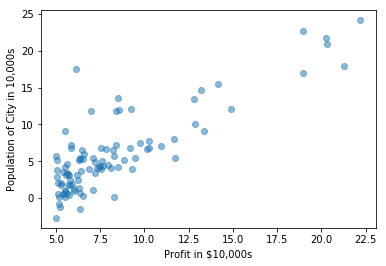

In [6]:
plt.scatter(df['x'], df['y'], alpha=0.5)

plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')

### 2.2 Gradient Descent

#### 2.2.1 Update Equations

Minimize the following function:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}\big(h_{\theta}(x^{(i)})-y^{(i)}\big)^2 $$

Where

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1 x_1 $$

The parameters $\theta_j$ are simoultaneously updated via:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \big(h_{\theta}(x^{(i)})-y^{(i)}\big) x_j^{(i)} $$

#### 2.2.2. Implementation

In [7]:
# first add a column of ones in the dataframe (for the intercept)
df.insert(0, 'int', 1)
df.head()

,int,x,y
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
# create a vector for predictors, real values and theta parameters
X = df[['int', 'x']].values
Y = df['y'].values
theta = np.array([0,0])

In [9]:
# initialize some computational parameters

iterations = 1500
alpha = 0.01 # the learning parameter

#### 2.2.3 Computing the cost $J(\theta)$

In [10]:
def cost(x, y, theta):
    m = y.shape[0]
    J = 0
    h = np.matmul(x, theta)
    J = (1/(2*m)) * sum((h - y)**2)
    return(J)

After testing the cost function with the initial values of zero for $\Theta$ we should get an answer of approximately $32.07$

In [11]:
cost(X,Y,theta)

32.072733877455654

This is exactly what we have expected. For further check of our cost function, there is one more test in the course excercise file using initial values of $\Theta$ of $-1$ and $2$. The expected answer is approximately $54.24$.

In [12]:
test_theta = np.array([-1,2])
cost(X,Y,test_theta)

54.24245508201238

#### 2.2.4 Gradient descent

In [13]:
def gradientDescent(x, y, theta):
    m = x.shape[0]
    J_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha/m) * np.matmul(np.transpose(x),(np.matmul(x, theta) - y))
        J_history[i] = cost(x, y, theta)
    return(theta, J_history)

So here we define a function which performs the gradient descent. The function returns two elements. The first one is how the cost is changing over iterations, and the second is the final values of $\Theta$.

In [14]:
cost_history = gradientDescent(X, Y, theta)[1]
final_theta = gradientDescent(X, Y, theta)[0]
print("The values of theta are {}, the expected values are -3.6303,1.1664".format(final_theta))

The values of theta are [-3.63029144  1.16636235], the expected values are -3.6303,1.1664


We can check how the cost is changing over iterations.

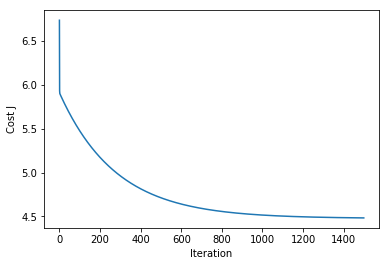

In [15]:
plt.figure()

plt.plot(list(range(iterations)), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')

plt.show()

Making a prediction for profits in areas with population of $35000$ and $70000$:

In [16]:
pop = ([[1, 35000], [1, 70000]])
pred = np.matmul(pop, final_theta)
print('For population = 35,000, we predict a profit of {}\nFor population = 70,000, we predict a profit of {}'.format(pred[0],pred[1]))

For population = 35,000, we predict a profit of 40819.05197030597
For population = 70,000, we predict a profit of 81641.73423205134


### 2.4 Visualizing $J(\theta)$

In [17]:
# define the grid space

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
x_axis, y_axis = np.meshgrid(theta0_vals, theta1_vals)

In [18]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [19]:
# fill the values of J

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = cost(X, Y, t)



#### 2.4.1 Surface plot

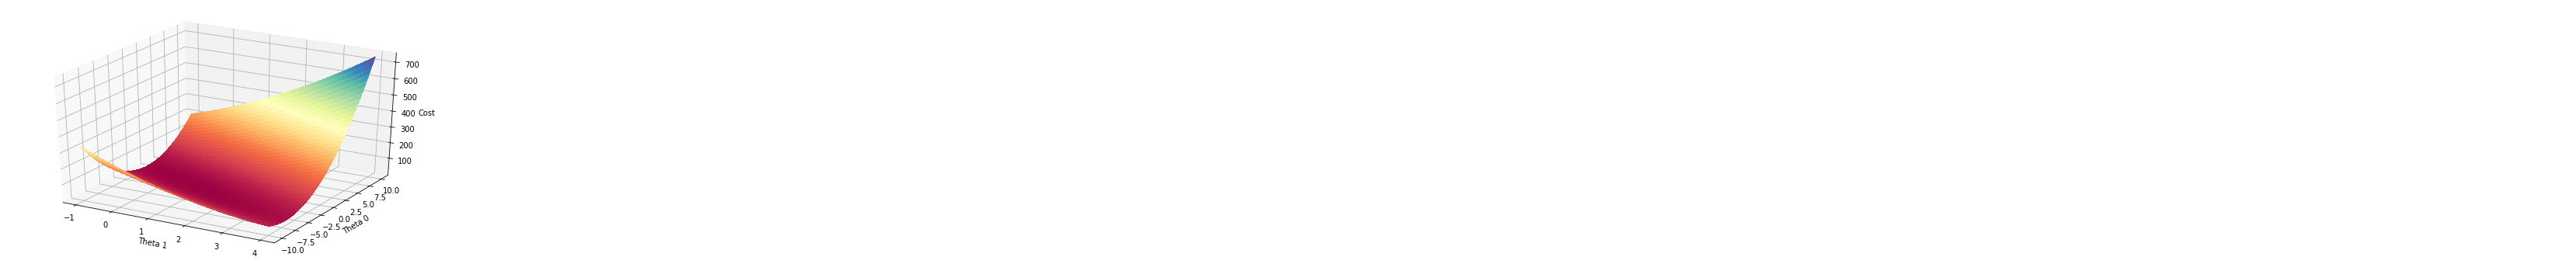

In [20]:
# plot the values of the cost function J
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Plot the surface
width = 10
height = 6
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(y_axis,x_axis, J_vals, cmap=cm.Spectral,
                       linewidth=0, antialiased=False)

ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 0')
ax.set_zlabel('Cost')

plt.show()

#### 2.4.1 Contour plot

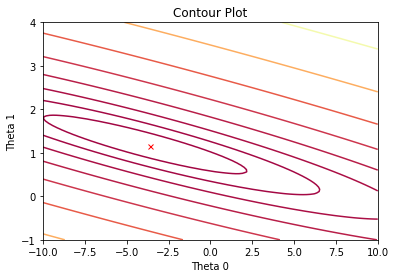

In [21]:
plt.figure()
levels = np.logspace(-2, 3, 20)
plt.contour(x_axis, y_axis, np.transpose(J_vals), cmap=cm.Spectral, levels = levels)
plt.plot([final_theta[0]], [final_theta[1]], marker='x', markersize=5, color="red") #the minimum value
plt.title('Contour Plot')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.show()

## 3. Linear regression with multiple variables

In [22]:
# import the data
file = 'ex1data2.txt'
df = pd.read_csv(data_directory + file, names = ['size','bedrooms','price'])

In [23]:
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Plotting the Data

Text(0, 0.5, 'Price of a house')

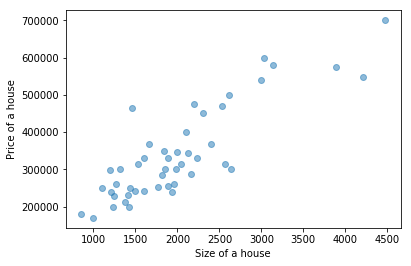

In [24]:
plt.scatter(df['size'], df['price'], alpha=0.5)

plt.xlabel('Size of a house')
plt.ylabel('Price of a house')

Text(0, 0.5, 'Price of a house')

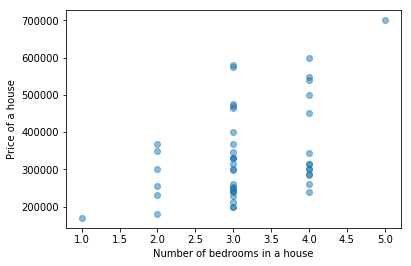

In [25]:
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)

plt.xlabel('Number of bedrooms in a house')
plt.ylabel('Price of a house')

Text(0, 0.5, 'Size of a house')

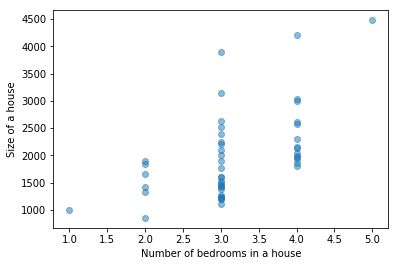

In [26]:
plt.scatter(df['bedrooms'], df['size'], alpha=0.5)

plt.xlabel('Number of bedrooms in a house')
plt.ylabel('Size of a house')

### 3.1 Feature Normalization

In [27]:
X = df[['size', 'bedrooms']]
Y = df[['price']]

In [28]:
size_mean = X.mean()[0]
bedrooms_mean = X.mean()[1]

size_sd = X.std()[0]
bedrooms_sd = X.std()[1]


In [29]:
# create a function which performs the feature normalization

def feature_norm(x):
    mean = np.mean(x)
    sd = np.std(x)
    x_norm = (x-mean)/sd
    return(x_norm)

In [30]:
for element in list(X.columns.values):
    new_name = element + '_norm'
    X[new_name] = feature_norm(X[element])

In [31]:
X.head()

,size,bedrooms,size_norm,bedrooms_norm
0,2104,3,0.131415,-0.226093
1,1600,3,-0.509641,-0.226093
2,2400,3,0.507909,-0.226093
3,1416,2,-0.743677,-1.554392
4,3000,4,1.271071,1.102205


In [32]:
# create a new dataframe only with normalized variables and a column for the intercept

X_norm = X.filter(like='_norm', axis=1)
X_norm.insert(0, 'int', 1)
X_norm.head()

,int,size_norm,bedrooms_norm
0,1,0.131415,-0.226093
1,1,-0.509641,-0.226093
2,1,0.507909,-0.226093
3,1,-0.743677,-1.554392
4,1,1.271071,1.102205


### 3.2 Gradient Descent

In [33]:
alpha = 0.1
iterations = 50
theta = np.zeros(X_norm.shape[1])


In [34]:
# Create a function to compute the cost. It will be similar to the one for single variable. 
# Here we will create the initial theta parameters inside the function

def computeCostMulti(x, y, theta):
    m = x.shape[0]
    a = np.transpose(np.matmul(x, np.transpose(theta)) - y.values.transpose()[0])
    b = np.matmul(x, np.transpose(theta)) - y.values.transpose()[0]
    J = (1/(2*m)) * np.matmul(a,b)
    return(J)

In [35]:
def gradientDescentMulti(x, y, theta, alpha = 0.01):
    m = x.shape[0]
    J_history = np.zeros(iterations)
    for i in range(iterations):
        theta = theta - (alpha/m) * np.matmul((np.matmul(x, np.transpose(theta)) - y.values.transpose()[0]), x)
        J_history[i] = computeCostMulti(x, y, theta)
    return(theta, J_history)

In [36]:
opt = gradientDescentMulti(X_norm,Y,theta, alpha = alpha)
final_theta = opt[0]
cost_values = opt[1]
print('Theta computed from gradient descent: {}'.format(final_theta))

Theta computed from gradient descent: [338658.2492493  103322.82942954   -474.74249522]


#### 3.2.1 Plots 

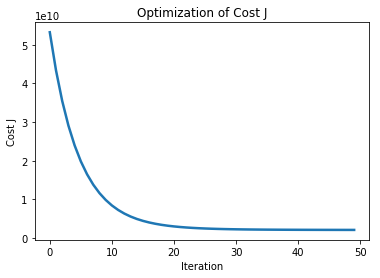

In [37]:
plt.figure()
plt.plot(range(iterations), cost_values, linewidth = 2.5)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Optimization of Cost J')
plt.show()

In [38]:
alphas = [0.001, 0.01, 0.1]
learning = []
for element in alphas:
    opt = gradientDescentMulti(X_norm,Y,theta, alpha = element)
    learning.append(opt)

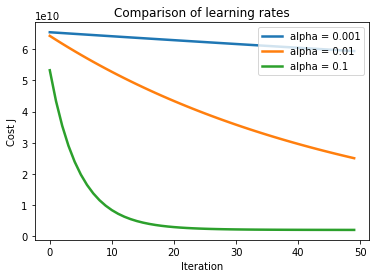

In [39]:
plt.figure()
plt.plot(range(iterations), learning[0][1], linewidth = 2.5)
plt.plot(range(iterations), learning[1][1], linewidth = 2.5)
plt.plot(range(iterations), learning[2][1], linewidth = 2.5)
plt.legend(['alpha = 0.001', 'alpha = 0.01', 'alpha = 0.1'], loc='upper right')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Comparison of learning rates')
plt.show()

#### 3.2.2 Prediction

In [40]:
# define the new values

x_pred = np.array([1650, 3])
x_pred_norm = np.array([1, (x_pred[0] - size_mean)/size_sd, (x_pred[1] - bedrooms_mean)/bedrooms_sd])
x_pred_norm

array([ 1.        , -0.4412732 , -0.22367519])

In [41]:
# make prediction
prediction = np.matmul(x_pred_norm, final_theta)
print('Predicted price of a 1650 sq-ft, 3 br house is ${}.'.format(int(prediction)))

Predicted price of a 1650 sq-ft, 3 br house is $293170.


### 3.3 Normal Equations

The closed form solution to the linear regression is the so called normal equation:

$$ \theta = (X^TX)^{-1}X^T\vec{y} $$

In [42]:
# add the column for the intercept

X = df[['size', 'bedrooms']]
X.insert(0, 'int', 1)
X.head()


,int,size,bedrooms
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4


In [43]:
# define a function which calculates the normal equation

def normalEqn(x,y):
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.transpose(x)), y.values.transpose()[0])
    return(theta)

In [44]:
answer = normalEqn(X, Y)

In [45]:
np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), Y.values)

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [46]:
print(final_theta, answer)

[338658.2492493  103322.82942954   -474.74249522] [89597.9095428    139.21067402 -8738.01911233]


In [47]:
prediction_equation = np.matmul(np.array([1,1650,3]), answer)
prediction_equation

293081.4643348959

In [48]:
print("Predicted price of a 1650 sq-ft, 3 br house using normal equation is ${}".format(prediction_equation))
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent is ${}.'.format(prediction))
print('There is a difference of ${}'.format(prediction_equation - prediction))

Predicted price of a 1650 sq-ft, 3 br house using normal equation is $293081.4643348959
Predicted price of a 1650 sq-ft, 3 br house using gradient descent is $293170.84172892285.
There is a difference of $-89.37739402696025


## Bonus section

To see if we did a great job we will compare our results with the results of fitted linear regression using the package ***sklearn***.

In [49]:
from sklearn import linear_model

In [50]:
X = pd.DataFrame(df, columns=["size","bedrooms"])

Y = pd.DataFrame(df, columns=["price"])

In [51]:
# fit the model
lm = linear_model.LinearRegression()

model = lm.fit(X,Y)

In [52]:
prediction_fit = lm.predict(np.array([[1650,3]]))

In [53]:
print("The intercept using the fitted model from sklearn package is {} \nThe intercept using normal equation is {} \nThe intercept using gradient descent is {}".format(float(model.intercept_), answer[0], final_theta[0]))

The intercept using the fitted model from sklearn package is 89597.90954279754 
The intercept using normal equation is 89597.90954279699 
The intercept using gradient descent is 338658.2492492953


In [54]:
print("The coeficients using the fitted model from sklearn package are {} \nThe coeficients using normal equation are {} \nThe coeficients using gradient descent are {}".format(model.coef_, answer[1:], final_theta[1:]))

The coeficients using the fitted model from sklearn package are [[  139.21067402 -8738.01911233]] 
The coeficients using normal equation are [  139.21067402 -8738.01911233] 
The coeficients using gradient descent are [103322.82942954   -474.74249522]


In [55]:
print("Predicted price of a 1650 sq-ft, 3 br house using sklearn is ${} \nPredicted price of a 1650 sq-ft, 3 br house using normal equation is ${} \nPredicted price of a 1650 sq-ft, 3 br house using gradient descent is ${}".format(int(prediction_fit), int(prediction_equation), int(prediction)))

Predicted price of a 1650 sq-ft, 3 br house using sklearn is $293081 
Predicted price of a 1650 sq-ft, 3 br house using normal equation is $293081 
Predicted price of a 1650 sq-ft, 3 br house using gradient descent is $293170


So, we are getting the same answer as the applied methods above. Our work is validated and we are now sure we have done the correct job.